In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [28]:
#path where you stored your copy of the nuScenes dataset.
DATAROOT = Path('/home/saramontese/Desktop/MasterThesis/example/nuscenes/dataset/data/sets/nuscenes')
dataset_file = 'dataset_from_ego_full.csv'

# Data Analysis


The dataset contains the following columns for each state of the self-driving car:

- instance_token: A unique identifier for the vehicle instance.
- translation: The vehicle's position in 3D space (x, y, z coordinates).
- yaw: The orientation of the vehicle around the vertical axis (rotation angle).
- velocity: The vehicle's speed in a given direction.
- acceleration: The change in velocity over time.
- heading_change_rate: The rate of change of the vehicle's direction.
- timestamp: The time at which the state was recorded.
- scene_token: A unique identifier for the scenario or environment the vehicle is in

Load the CSV data into a DataFrame


In [29]:

dtype_dict = {
    'modality': 'category',  # for limited set of modalities, 'category' is efficient
    'scene_token': 'str',  
    'timestamp': 'str',  # To enable datetime operations
    'rotation': 'object',  # Quaternion (lists)
    'x': 'float64',
    'y': 'float64',
    'z': 'float64',
    'yaw': 'float64',  
    'velocity': 'float64',
    'acceleration': 'float64',
    'heading_change_rate': 'float64',
    'delta_local_x': 'float64',
    'delta_local_y': 'float64'
}
df = pd.read_csv(DATAROOT / dataset_file, dtype=dtype_dict, parse_dates=['timestamp'])

df.head()

,modality,scene_token,timestamp,rotation,x,y,z,yaw,velocity,acceleration,heading_change_rate,delta_local_x,delta_local_y
0,lidar,0053e9c440a94c1b84bd9c4223efc4b0,2018-07-27 16:20:30.048445,"[0.2766247744031405, -0.0027369692279543625, 0...",427.968589,1622.155824,0.0,2.581053,0.000018,0.000028,0.000212,0.000000e+00,0.000000
1,lidar,0053e9c440a94c1b84bd9c4223efc4b0,2018-07-27 16:20:30.548859,"[0.27663215946727443, -0.002737971665731827, 0...",427.968593,1622.155822,0.0,2.581038,0.000008,-0.000020,-0.000031,-7.657486e-11,-0.000004
2,lidar,0053e9c440a94c1b84bd9c4223efc4b0,2018-07-27 16:20:31.048731,"[0.27662503731230986, -0.002729398219646146, 0...",427.968591,1622.155823,0.0,2.581052,0.000004,-0.000008,0.000029,7.038325e-10,0.000002
3,lidar,0053e9c440a94c1b84bd9c4223efc4b0,2018-07-27 16:20:31.448537,"[0.2766891809143752, -0.0027446222315419917, 0...",427.968585,1622.155827,0.0,2.580919,0.000018,0.000036,-0.000334,9.009808e-10,0.000007
4,lidar,0053e9c440a94c1b84bd9c4223efc4b0,2018-07-27 16:20:31.948403,"[0.276690691475819, -0.002853827740243303, 0.0...",427.968578,1622.155832,0.0,2.580916,0.000017,-0.000003,-0.000005,-5.687954e-10,0.000009


In [30]:
df.shape

(32449, 13)

### Variantion for position, velocity, acceleration, yaw, heading_change_rate

In [31]:
delta_df = pd.DataFrame()
delta_df['x_diff'] = df.groupby('scene_token')['x'].diff()
delta_df['y_diff'] = df.groupby('scene_token')['y'].diff()
delta_df['z_diff'] = df.groupby('scene_token')['z'].diff()
delta_df['velocity_diff'] = df.groupby('scene_token')['velocity'].diff()
delta_df['acceleration_diff'] = df.groupby('scene_token')['acceleration'].diff()
delta_df['yaw_diff'] = df.groupby('scene_token')['yaw'].diff()
delta_df['heading_change_rate_diff'] = df.groupby('scene_token')['heading_change_rate'].diff()
delta_df['delta_local_x_diff'] = df.groupby('scene_token')['delta_local_x'].diff()
delta_df['delta_local_y_diff'] = df.groupby('scene_token')['delta_local_y'].diff()


In [32]:
abs_df = pd.DataFrame()
abs_df['abs_x_diff'] = df.groupby('scene_token')['x'].diff().abs()
abs_df['abs_y_diff'] = df.groupby('scene_token')['y'].diff().abs()
abs_df['abs_z_diff'] = df.groupby('scene_token')['z'].diff().abs()
abs_df['abs_velocity_diff'] = df.groupby('scene_token')['velocity'].diff().abs()
abs_df['abs_acceleration_diff'] = df.groupby('scene_token')['acceleration'].diff().abs()
abs_df['abs_yaw_diff'] = df.groupby('scene_token')['yaw'].diff().abs()
abs_df['abs_heading_change_rate_diff'] = df.groupby('scene_token')['heading_change_rate'].diff().abs()
abs_df['abs_delta_local_x_diff'] = df.groupby('scene_token')['delta_local_x'].diff()
abs_df['abs_delta_local_y_diff'] = df.groupby('scene_token')['delta_local_y'].diff()


### Feature analysis

####  Original Dataset

In [49]:
numeric_columns = ['velocity', 'acceleration', 'yaw', 'heading_change_rate', 'delta_local_x', 'delta_local_y']

stats = df[['velocity', 'acceleration', 'yaw', 'heading_change_rate']].describe()
stats.loc[['mean', 'std', 'min', 'max']]

,velocity,acceleration,yaw,heading_change_rate
mean,5.091121,0.004636,0.222662,0.000734
std,3.596475,0.647916,1.836088,0.778293
min,0.000000,-4.839118,-3.141337,-15.664581
max,18.439187,3.383211,3.140702,15.413213


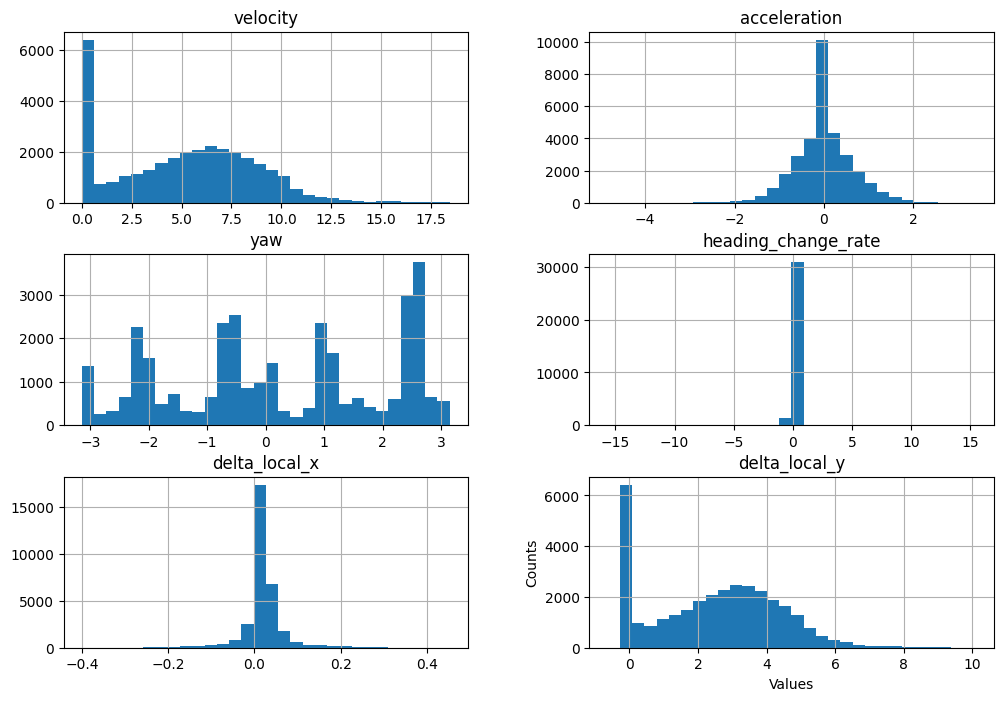

In [34]:
df[['velocity', 'acceleration', 'yaw', 'heading_change_rate']].hist(bins=30, figsize=(12, 8))

plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

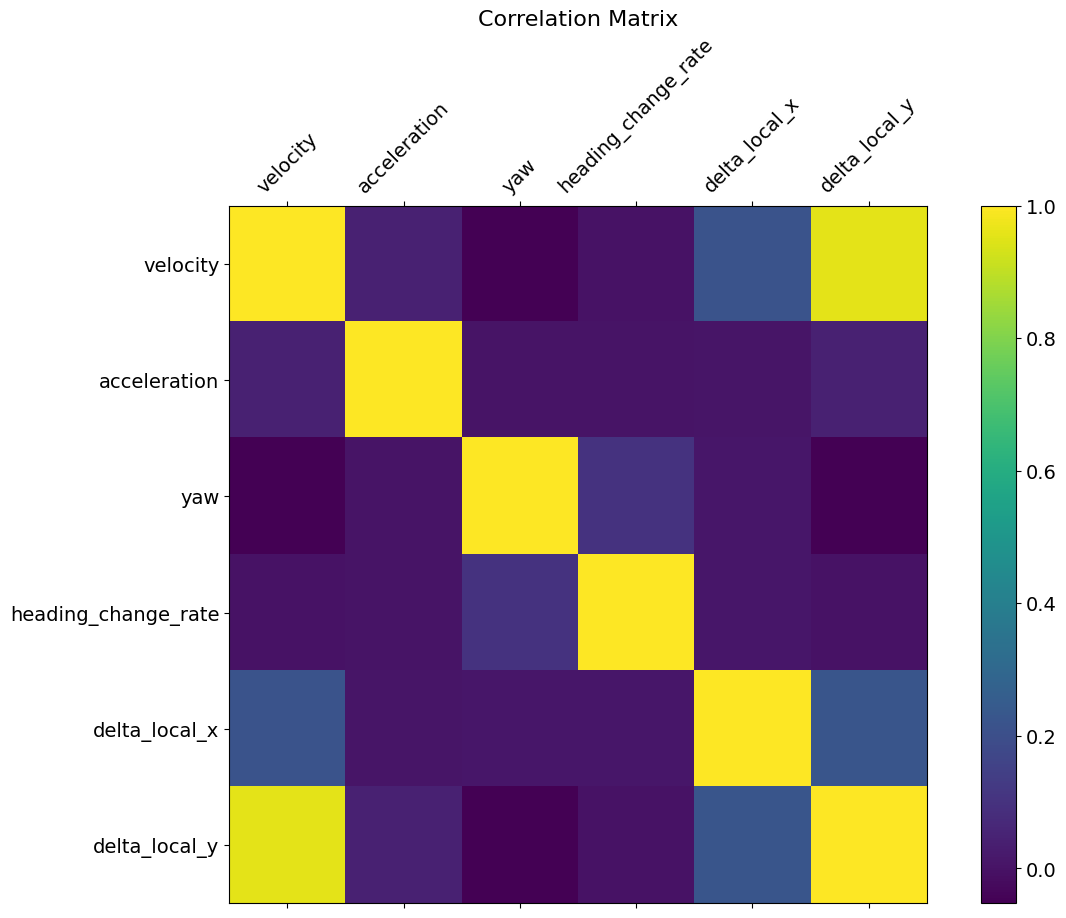

In [51]:
f = plt.figure(figsize=(14, 9))
plt.matshow(df[numeric_columns].corr(), fignum=f.number)
plt.xticks(range(df[numeric_columns].select_dtypes(['number']).shape[1]), df[numeric_columns].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df[numeric_columns].select_dtypes(['number']).shape[1]), df[numeric_columns].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#### Variation  Dataset

In [35]:
stats = delta_df[['x_diff', 'y_diff', 'z_diff', 'velocity_diff', 'acceleration_diff', 'yaw_diff', 'heading_change_rate_diff']].describe()
stats.loc[['mean', 'std', 'min', 'max']]


,x_diff,y_diff,z_diff,velocity_diff,acceleration_diff,yaw_diff,heading_change_rate_diff,delta_local_x_diff,delta_local_y_diff
mean,0.015563,0.005099,0.0,0.001969,-0.001040,0.000183,0.000501,0.000476,0.067987
std,2.326770,2.071664,0.0,0.322763,0.420486,0.388615,1.138504,0.023528,0.577857
min,-6.781485,-7.394914,0.0,-2.418950,-4.843464,-6.280909,-25.112800,-0.302903,-2.691306
max,8.450918,6.814903,0.0,1.695012,3.209952,6.279785,15.763745,0.427413,8.806697


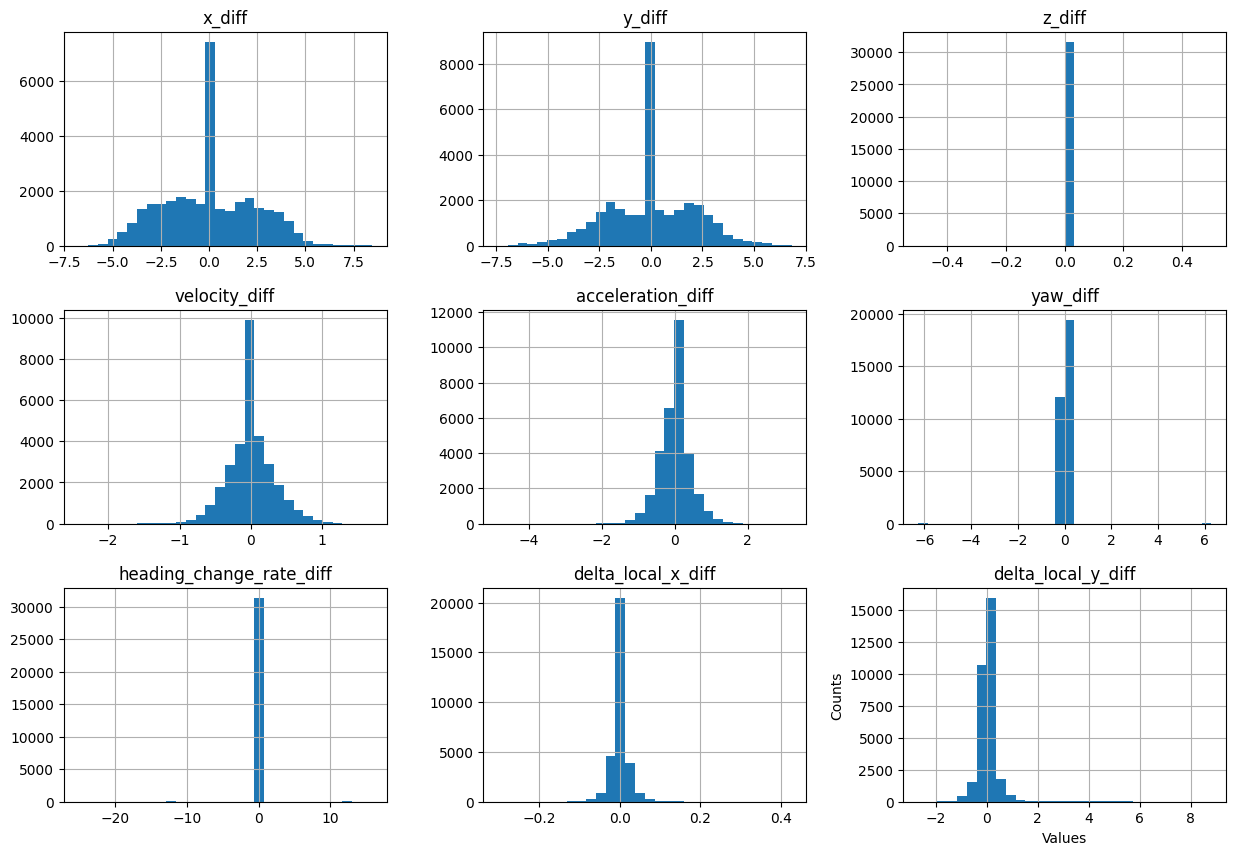

In [36]:
delta_df[['x_diff', 'y_diff', 'z_diff', 'velocity_diff', 'acceleration_diff', 'yaw_diff', 'heading_change_rate_diff']].hist(bins=30, figsize=(15, 10))

plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

Correlation Matrix


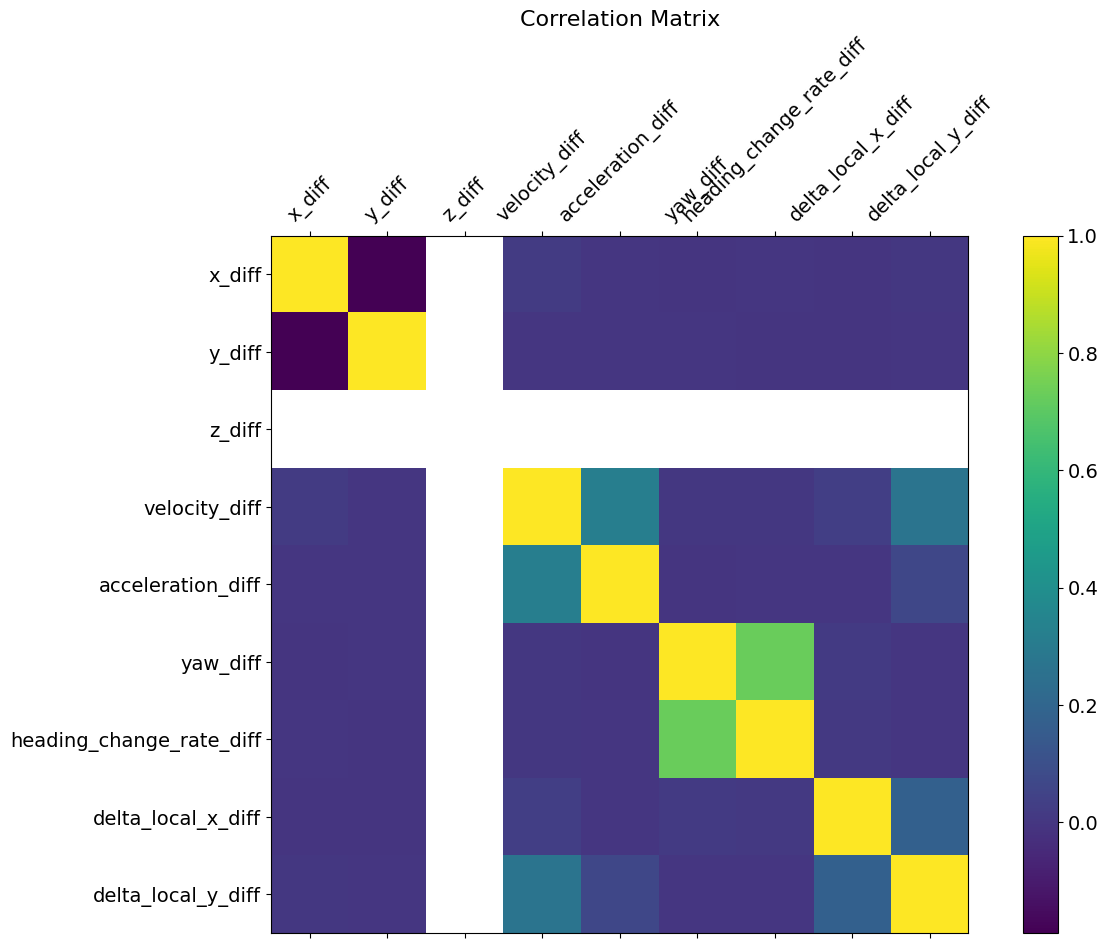

In [46]:
f = plt.figure(figsize=(14, 9))
plt.matshow(delta_df.corr(), fignum=f.number)
plt.xticks(range(delta_df.select_dtypes(['number']).shape[1]), delta_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(delta_df.select_dtypes(['number']).shape[1]), delta_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#### Absolute Variation Dataset

In [38]:
abs_stats = abs_df[['abs_x_diff', 'abs_y_diff', 'abs_z_diff', 'abs_velocity_diff', 'abs_acceleration_diff', 'abs_yaw_diff', 'abs_heading_change_rate_diff']].describe()
abs_stats.loc[['mean', 'std', 'min', 'max']]


,abs_x_diff,abs_y_diff,abs_z_diff,abs_velocity_diff,abs_acceleration_diff,abs_yaw_diff,abs_heading_change_rate_diff
mean,1.789415,1.527369,0.0,0.225481,0.291673,4.269880e-02,1.109678e-01
std,1.487278,1.399603,0.0,0.230947,0.302876,3.862625e-01,1.133083e+00
min,0.000000,0.000000,0.0,0.000000,0.000000,1.048140e-11,1.233002e-11
max,8.450918,7.394914,0.0,2.418950,4.843464,6.280909e+00,2.511280e+01


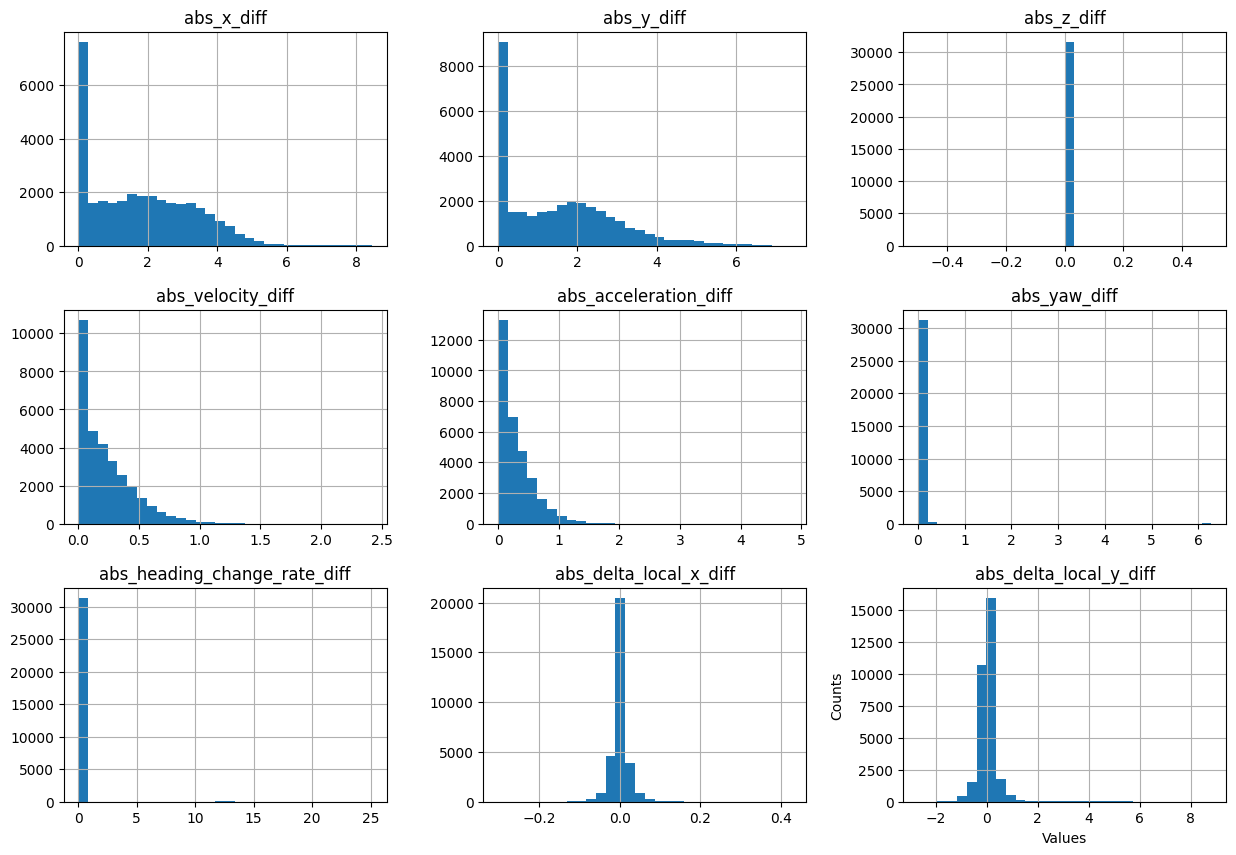

In [39]:
abs_df[['abs_x_diff', 'abs_y_diff', 'abs_z_diff', 'abs_velocity_diff', 'abs_acceleration_diff', 'abs_yaw_diff', 'abs_heading_change_rate_diff']].hist(bins=30, figsize=(15, 10))

plt.xlabel("Values")
plt.ylabel("Counts")
plt.show()

Interpretation:
- x_diff:
- y_diff:
Since these have broader distributions, setting a threshold might require considering the context of the movement. If you're looking to detect significant lateral movements (e.g., lane changes), you might set a threshold around the higher frequency lower-end values.

- z_diff: The z differences are concentrated near zero with a very sharp peak, indicating that there is very little change in the vertical position, which is expected for a vehicle traveling on relatively flat surfaces. (0.05-0.1)


- velocity_diff: high concentration at the lower end, suggesting that velocity changes between consecutive measurements are generally small, with occasional larger changes.
    Plausible threshold to detect meaningful acceleration or deceleration might be set just above the most frequent low-end changes, possibly in the range where the histogram bars start to significantly lower. (0.1-0.2 m/s)


- acceleration_diff: most acceleration changes are close to zero, with a few instances of larger differences. This pattern is typical for driving in urban environments, where acceleration and deceleration are frequent but not extreme. Threshold might be set at a value that excludes the majority of these minor changes but captures the less frequent larger changes. (5-10)


- yaw_diff: histogram is highly skewed towards smaller values, indicating that most of the time, there are only slight changes in orientation, which corresponds to driving mostly straight with occasional turns. (0.1-0.2)


- heading_change_rate_diff:Similar to yaw_diff, the histogram for heading change rate differences is skewed towards smaller values. The vehicle mostly maintains its heading with only slight variations within the sampled timeframe. (0.01-0.02)

